In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../cs-training.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.dropna(inplace=True)

In [4]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
data = df.to_numpy()
data

array([[ 1.        ,  0.76612661, 45.        , ...,  6.        ,
         0.        ,  2.        ],
       [ 0.        ,  0.95715102, 40.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.65818014, 38.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.29974515, 44.        , ...,  1.        ,
         0.        ,  2.        ],
       [ 0.        ,  0.        , 30.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.85028295, 64.        , ...,  2.        ,
         0.        ,  0.        ]])

In [14]:
X, y = data[:,1:], data[:,0]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Grid search Cross Validation
params = {
      "n_estimators":[i for i in range(50,150,10)]
}
cv = GridSearchCV(
       estimator=RandomForestClassifier(n_jobs=-1),
       param_grid=params,
       n_jobs=-1,
       cv=5,
       verbose=1
)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140]},
             verbose=1)

In [40]:
res = pd.DataFrame(cv.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.939393,0.129615,0.066663,0.012619,50,{'n_estimators': 50},0.932599,0.934002,0.933846,0.931456,0.933482,0.933077,0.000945,10
1,16.389209,0.231649,0.123393,0.035243,60,{'n_estimators': 60},0.933171,0.933846,0.934262,0.931871,0.933586,0.933347,0.000819,8
2,18.966321,0.186384,0.091589,0.024056,70,{'n_estimators': 70},0.933015,0.933326,0.933638,0.932755,0.934106,0.933368,0.000473,5
3,23.794906,0.934335,0.210964,0.093656,80,{'n_estimators': 80},0.932443,0.933326,0.933638,0.931923,0.934522,0.933171,0.000911,9
4,28.667586,0.451416,0.183188,0.075737,90,{'n_estimators': 90},0.931871,0.933586,0.934678,0.932131,0.934574,0.933368,0.001182,5
5,31.070017,0.594131,0.247005,0.128674,100,{'n_estimators': 100},0.932755,0.933794,0.934158,0.932235,0.934262,0.933441,0.000805,3
6,32.583098,0.794644,0.383564,0.046458,110,{'n_estimators': 110},0.932963,0.933482,0.933950,0.932131,0.935249,0.933555,0.001040,2
7,34.236591,0.291993,0.291629,0.156133,120,{'n_estimators': 120},0.932235,0.934054,0.934314,0.931715,0.934522,0.933368,0.001158,7
8,35.905204,0.421442,0.387863,0.072851,130,{'n_estimators': 130},0.933846,0.933950,0.934626,0.933067,0.934730,0.934044,0.000602,1
9,28.176091,7.765416,0.201194,0.071019,140,{'n_estimators': 140},0.932339,0.934262,0.934210,0.932027,0.934106,0.933389,0.000991,4


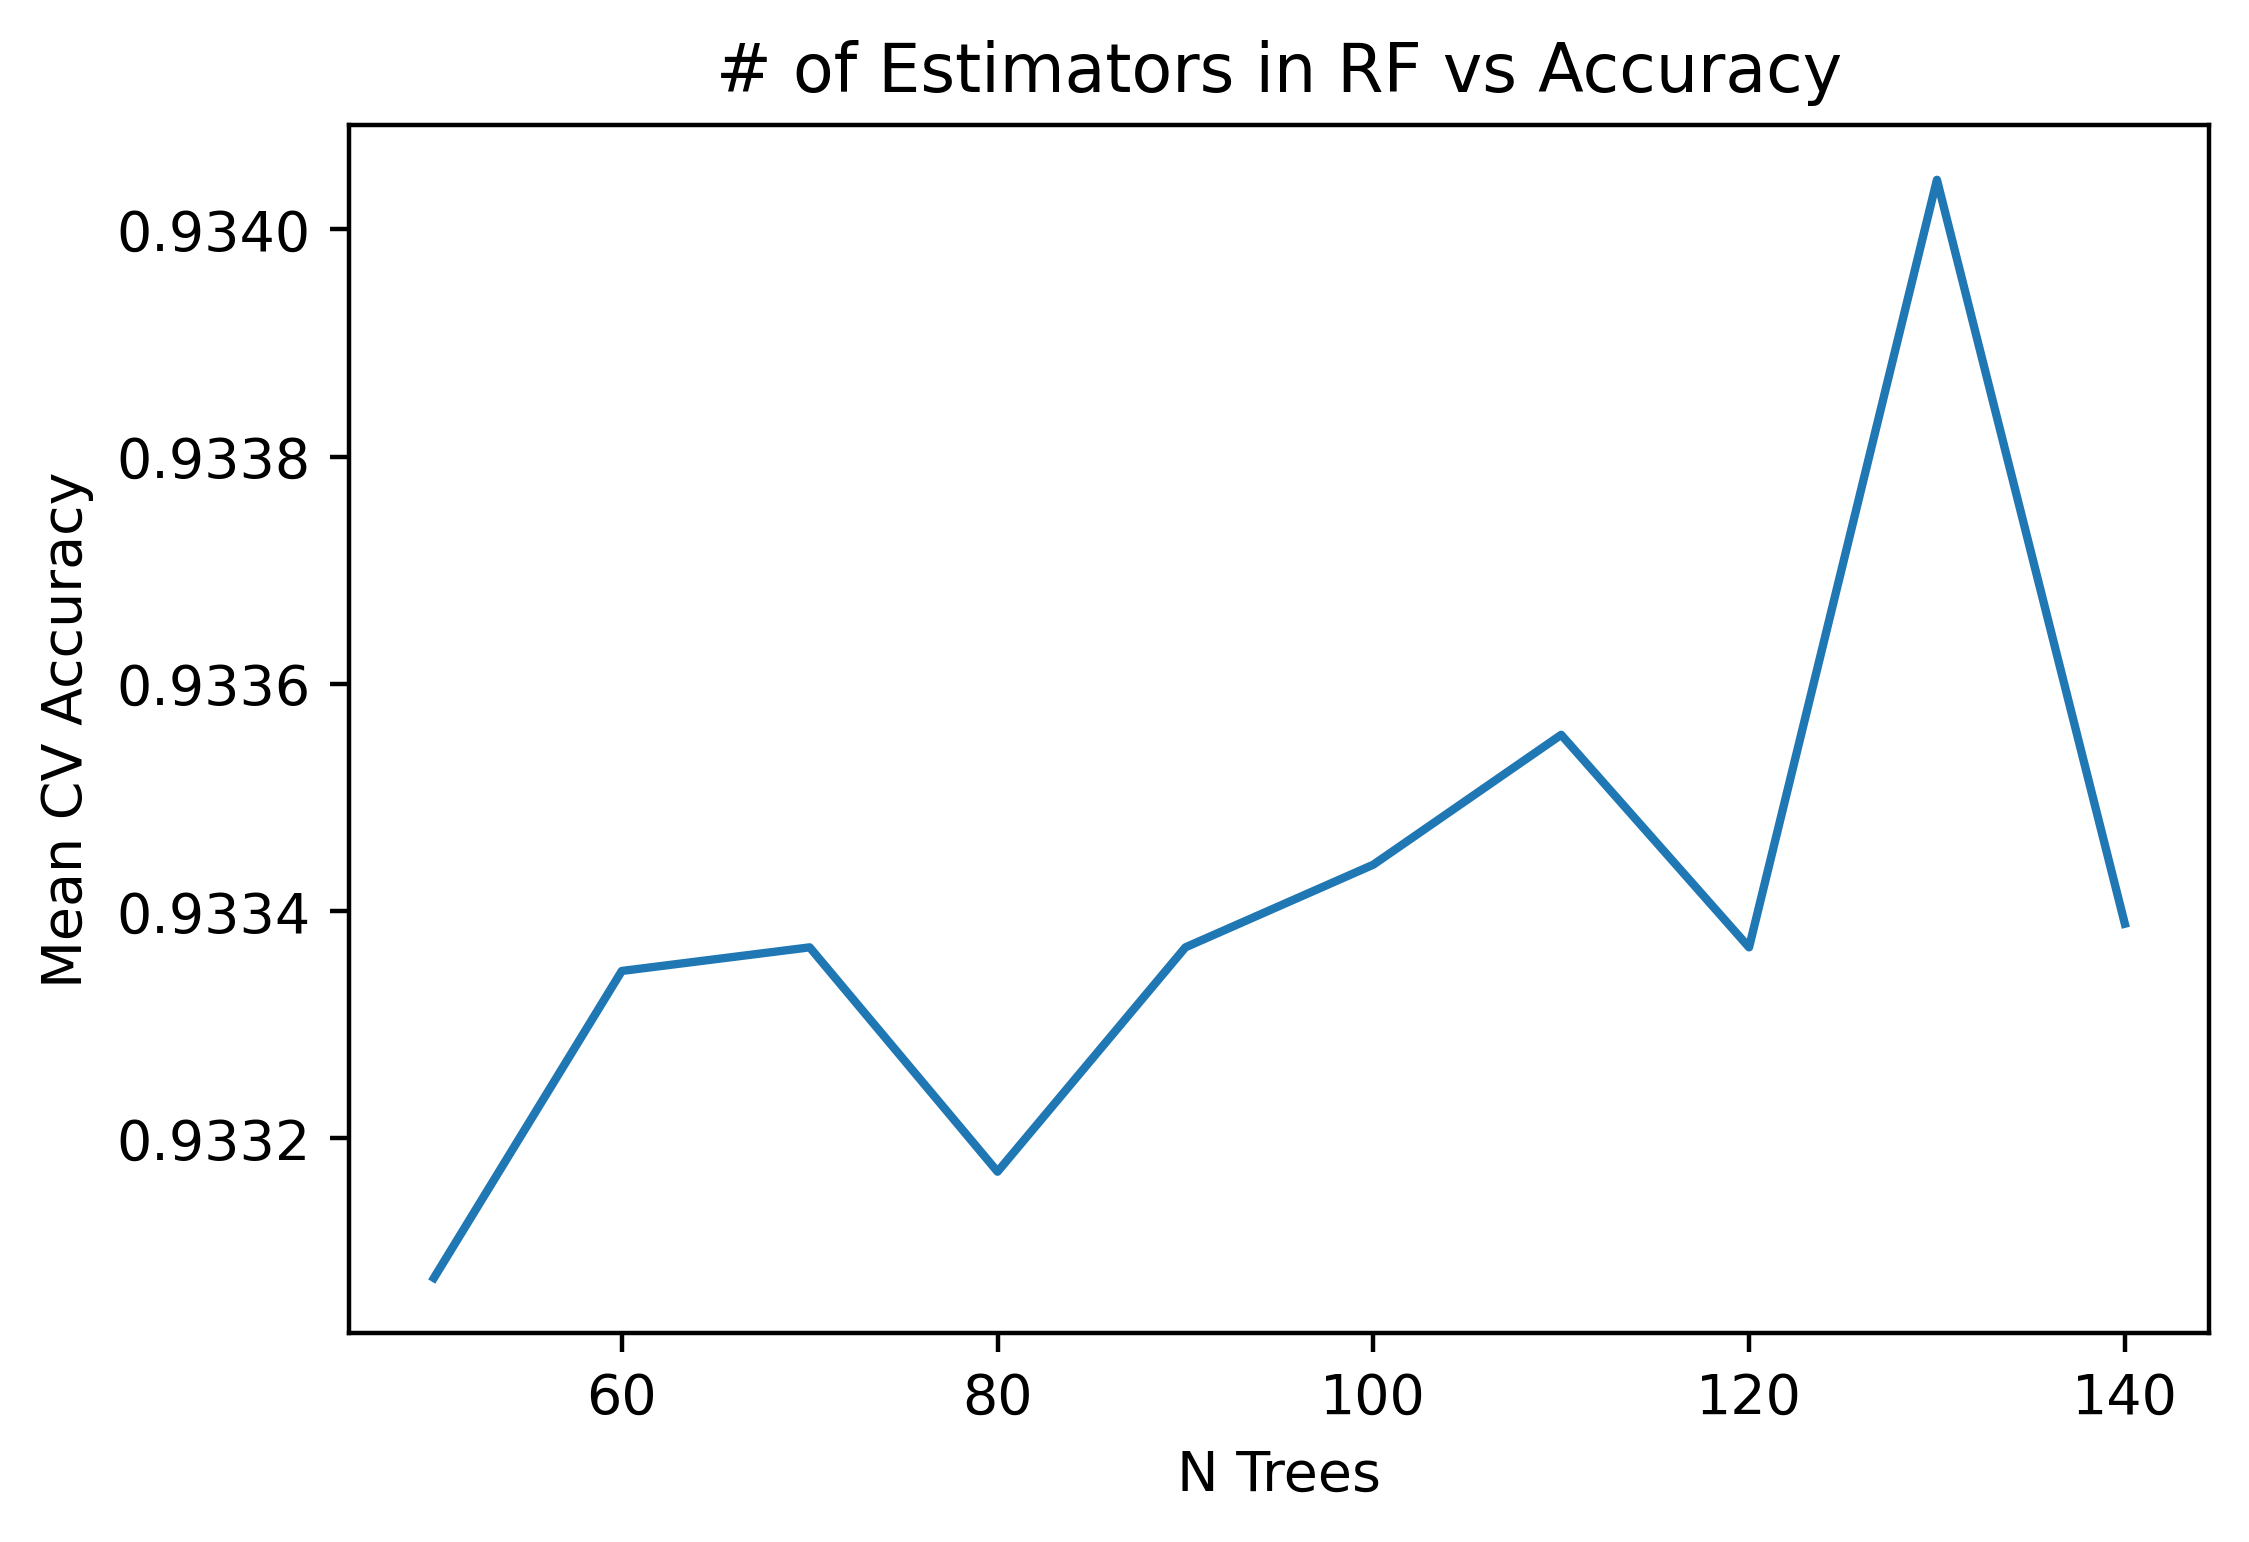

In [41]:
plt.figure(dpi=400) # sets resolution of plot
ax = sns.lineplot(
       data=res,
       x="param_n_estimators",
       y="mean_test_score",
       palette="magma"
)

ax.set(xlabel='N Trees', ylabel='Mean CV Accuracy', title="# of Estimators in RF vs Accuracy")

plt.show()

In [44]:
rf = cv.best_estimator_
print(f"Best CV Score -> {cv.best_score_}")
print("Best Parameters")
for param, val in cv.best_params_.items():
       print(f"{param} -> {val}")

Best CV Score -> 0.9340435483032792
Best Parameters
n_estimators -> 130


We can also see variable importance!

In [89]:
print("Feature Importances\n")
for index, column in enumerate(df.columns[1:]):
       print(f"{column:>36s} -> {rf.feature_importances_[index]*100:.2f}%")

Feature Importances

RevolvingUtilizationOfUnsecuredLines -> 18.98%
                                 age -> 12.07%
NumberOfTime30-59DaysPastDueNotWorse -> 5.01%
                           DebtRatio -> 17.33%
                       MonthlyIncome -> 16.24%
     NumberOfOpenCreditLinesAndLoans -> 8.87%
             NumberOfTimes90DaysLate -> 8.92%
        NumberRealEstateLoansOrLines -> 3.46%
NumberOfTime60-89DaysPastDueNotWorse -> 4.65%
                  NumberOfDependents -> 4.47%


Predict using test set and determine accuracy

In [90]:
pred = rf.predict(X_test)
accuracy = sum(pred==y_test)/len(y_test)
print(f"Accuracy -> {accuracy*100}%")

Accuracy -> 93.11964745988193%


But.. Accuracy isn't enough! Now, for evaluation metrics...
- Confusion Matrix
- Precision, Recall, F1
- AUROC

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, RocCurveDisplay

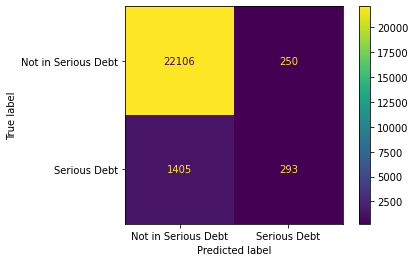

In [63]:
# Confusion Matrix
conf_m = ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["Not in Serious Debt", "Serious Debt"])

In [64]:
# Precision, Recall, and F-1
print(f"Precision -> {precision_score(y_test, pred)}")
print(f"Recall -> {recall_score(y_test, pred)}")
print(f"F-1 -> {f1_score(y_test, pred)}")

Precision -> 0.5395948434622467
Recall -> 0.17255594817432274
F-1 -> 0.2614904060687193


Here, even thouh the accuracy is high, the precision and recall scores are quite low. This is likely because there are so many more 0's than 1's, that the random forest will find it better to maximize accuracy by just selecting 0 (because its more likely). It is clear from the precision that only 53% of the predictions for "serious in debt" are correct. It is clear from the recall that only 17% of people serious in debt were correctly identified by the model. Accuracy of 93% is very misleading here, and the precision, recall and f1 metrics illustrate this nicely. 

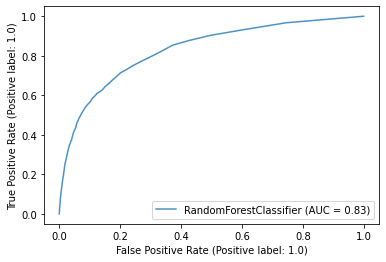

In [67]:
# ROC and AUC-ROC
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test, alpha=0.8)

This ROC curve looks OK, but not the greatest.